In [2]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import *
from sklearn.cross_validation import *
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('cleveland.csv', header = None)### 282 samples 75 columns
data_cleveland = pd.DataFrame(data)


data2 = pd.read_csv('hungarian.csv', header = None) ###294 samples 75 columns
data_hungary = pd.DataFrame(data2)


data3= pd.read_csv('switzerland.csv', header = None)###123 samples 75 columns
data_switzerland=pd.DataFrame(data3)


data4= pd.read_csv('long-beach-va.csv', header = None)###200 samples 75 columns
data_longbeach=pd.DataFrame(data4)

In [3]:
#remove list--['id','ccf','ekgmo','ekgday','ekgyr','thaltime','dummy','restckm','exerckm','cmo','cday','cyr',
#'junk','name','lvx1','lvx2','lvx3','lvx4','lvf','cathef']
#dummify list--['pncaden','cp','restecg','proto','slope','ca','restwm','restwm','thal']

###continuous variables
##age, trestbps,chol,cigs,years,prop,proto, thaldur,met,
### thalach,thalrest, tpeakbps,tpeakbpd,trestbpd,oldpeak,slope,rldv5,rldv5e,ca,thal,thalsev,lmt,
### ladprox,

# 1 id: patient identification number--remove
#       2 ccf: social security number (I replaced this with a dummy value of 0)--remove
#       3 age: age in years
#       4 sex: sex (1 = male; 0 = female)
#       5 painloc: chest pain location (1 = substernal; 0 = otherwise)
#       6 painexer (1 = provoked by exertion; 0 = otherwise)
#       7 relrest (1 = relieved after rest; 0 = otherwise)
#       8 pncaden (sum of 5, 6, and 7)--dummify
#       9 cp: chest pain type--dummify
#         -- Value 1: typical angina
#         -- Value 2: atypical angina
#         -- Value 3: non-anginal pain
#         -- Value 4: asymptomatic
#      10 trestbps: resting blood pressure (in mm Hg on admission to the 
#         hospital)
#      11 htn
#      12 chol: serum cholestoral in mg/dl
#      13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
#      14 cigs (cigarettes per day)
#      15 years (number of years as a smoker)
#      16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
#      17 dm (1 = history of diabetes; 0 = no such history)
#      18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
#      19 restecg: resting electrocardiographic results---dummify
#         -- Value 0: normal
#         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
#                     elevation or depression of > 0.05 mV)
#         -- Value 2: showing probable or definite left ventricular hypertrophy
#                     by Estes' criteria
#      20 ekgmo (month of exercise ECG reading)--remove
#      21 ekgday(day of exercise ECG reading)---remove
#      22 ekgyr (year of exercise ECG reading)--remove
#      23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
#      24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
#      25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
#      26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
#      27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
#      28 proto: exercise protocol----dummify
#           1 = Bruce     
#           2 = Kottus
#           3 = McHenry
#           4 = fast Balke
#           5 = Balke
#           6 = Noughton 
#           7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was 
#               written!)
#           8 = bike 125 kpa min/min  
#           9 = bike 100 kpa min/min
#          10 = bike 75 kpa min/min
#          11 = bike 50 kpa min/min
#          12 = arm ergometer
#      29 thaldur: duration of exercise test in minutes
#      30 thaltime: time when ST measure depression was noted--remove
#      31 met: mets achieved
#      32 thalach: maximum heart rate achieved
#      33 thalrest: resting heart rate
#      34 tpeakbps: peak exercise blood pressure (first of 2 parts)
#      35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
#      36 dummy---remove
#      37 trestbpd: resting blood pressure
#      38 exang: exercise induced angina (1 = yes; 0 = no)
#      39 xhypo: (1 = yes; 0 = no)
#      40 oldpeak = ST depression induced by exercise relative to rest
#      41 slope: the slope of the peak exercise ST segment--dummify
#         -- Value 1: upsloping
#         -- Value 2: flat
#         -- Value 3: downsloping
#      42 rldv5: height at rest
#      43 rldv5e: height at peak exercise
#      44 ca: number of major vessels (0-3) colored by flourosopy--dummify
#      45 restckm: irrelevant--remove
#      46 exerckm: irrelevant--remove
#      47 restef: rest raidonuclid (sp?) ejection fraction
#      48 restwm: rest wall (sp?) motion abnormality--dummify
#         0 = none
#         1 = mild or moderate
#         2 = moderate or severe
#         3 = akinesis or dyskmem (sp?)
#      49 exeref: exercise radinalid (sp?) ejection fraction
#      50 exerwm: exercise wall (sp?) motion 
#      51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect--dummify
#      52 thalsev: not used
#      53 thalpul: not used
#      54 earlobe: not used
#      55 cmo: month of cardiac cath (sp?)  (perhaps "call")--remove
#      56 cday: day of cardiac cath (sp?)--remove
#      57 cyr: year of cardiac cath (sp?)--remove
#      58 num: diagnosis of heart disease (angiographic disease status)--copied else where
#         -- Value 0: < 50% diameter narrowing
#         -- Value 1: > 50% diameter narrowing
#         (in any major vessel: attributes 59 through 68 are vessels)
#      59 lmt
#      60 ladprox
#      61 laddist
#      62 diag
#      63 cxmain
#      64 ramus
#      65 om1
#      66 om2
#      67 rcaprox
#      68 rcadist
#      69 lvx1: not used--remove
#      70 lvx2: not used--remove
#      71 lvx3: not used--remove
#      72 lvx4: not used--remove
#      73 lvf: not used--remove
#      74 cathef: not used--remove
#      75 junk: not used--remove
#      76 name: last name of patient --remove

In [4]:
#combine all dataframes  ###899 rows
df= data_cleveland.append(data_hungary).append(data_switzerland).append(data_longbeach)

df.columns=['id','ccf','age','sex','painloc','painexer','relrest', 'pncaden',
           'cp', 'trestbps', 'htn', 'chol','smoke', 'cigs', 
            'years', 'fbs', 'dm', 'famhist','restecg','ekgmo', 'ekgday', 'ekgyr', 
            'dig', 'prop', 'nitr', 'pro', 'diuretic','proto','thaldur','thaltime',
            'met', 'thalach','thalrest','tpeakbps','tpeakbpd','dummy','trestbpd',
            'exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm',
            'exerckm','restef','restwm','exeref','exerwm','thal','thalsev',
            'thalpul','earlobe','cmo','cday','cyr','num','lmt','ladprox','laddist',
            'diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2',
            'lvx3','lvx4','lvf','cathef','junk','name']
df=df.replace(to_replace=-9, value=np.nan)
df=df.reset_index(drop=True)

df_response=df['num']###response label column back up

df=df.drop('num', axis=1)####dropping the response variable from the dataframe

###manually dummify the variables in df_response so that we could use all algorithms from our
###from challenges: just 2 classes, healthy or diseased 

df_response=df_response.apply(lambda x: 1 if x >1 else x)

###remove useless columns from df and dummify and add new columns for those categories
remove_col_list= ['id','ccf','ekgmo','ekgday','ekgyr','thaltime','dummy','restckm',
                'exerckm','cmo','cday','cyr',
                'junk','name','lvx1','lvx2','lvx3','lvx4','lvf','cathef']

dummify_col_list=['pncaden','cp','restecg','proto','slope','ca','restwm','thal']


df=df.drop(remove_col_list,axis=1)

for i in range(len(dummify_col_list)):
    df_dummies = pd.get_dummies(df[dummify_col_list[i]],dummy_na=True)
    dum_prefix= dummify_col_list[i]
    dum_columns_list= list(df_dummies.columns)
    dum_new_columns_list=[str(dum_prefix)+'_'+str(z) for z in dum_columns_list]
    df_dummies.columns=dum_new_columns_list
    df=df.drop([dum_prefix],axis=1)##important to drop the col being dummified
    df = pd.concat([df, df_dummies], axis=1)



In [5]:
%matplotlib inline
count_null=[]
for i in range(len(df.columns)):###only 75 columns here
    count_null.append(df[df.columns[i]].isnull().sum())
    
count_null=[(i)*100/len(df) for i in count_null] 

# if more than 95 % data is not recorded it is most probably not important
index_nan= [i for i, j in enumerate(count_null) if j >=95]

df=df.drop(df.columns[index_nan], axis=1)

###now remove dummy columns which have no corresponding real columns such as pncaden_nan etc
df=df.drop('pncaden_nan',axis=1)

# print df.columns

In [6]:
###simplifying the model
# # df.iloc[:,40:50].describe()

# # simple_model_columns=['age','sex','smoke','cigs','years','famhist']
# simple_model_columns=['age','sex','cigs','famhist']
# drop_column_simple= [item for item in df.columns if item not in simple_model_columns]
# # print drop_column_simple
# df=df.drop(drop_column_simple,axis=1)

# df.describe()
###age, sex, smoke, cigs, years(as smoker), famhist

In [7]:
from sklearn.preprocessing import Imputer
y=df_response###only response
X=df###only features

imp = Imputer(missing_values='NaN', strategy='median', axis=0)##impute along columns
imp_X= imp.fit_transform(X)##impute whole data frame and use it to split

X=imp_X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler_list=['age', 'trestbps','chol','cigs','years','prop','thaldur','met','thalach','thalrest',
             'tpeakbps','tpeakbpd','trestbpd','oldpeak','rldv5','rldv5e','thalsev','lmt','ladprox']
# getting scaler column indices from latest df
scaler_list_num=[i for i,item in enumerate(list(df.columns)) if item in scaler_list]


X_train=pd.DataFrame.from_records(X_train)
X_test=pd.DataFrame.from_records(X_test)

X_train_contns=X_train.iloc[:,scaler_list_num]

X_test_contns=X_test.iloc[:,scaler_list_num]

std_scale = preprocessing.StandardScaler().fit(X_train_contns)# do we use all or only training 

X_train_contns_std = std_scale.transform(X_train_contns)
X_test_contns_std = std_scale.transform(X_test_contns)

df_X_train_contns_std = pd.DataFrame.from_records(X_train_contns_std)
df_X_test_contns_std = pd.DataFrame.from_records(X_test_contns_std)


categorical_columns_list= [item for item in list(X_train.columns) if item not in scaler_list_num]


df_X_train_categorical=X_train[categorical_columns_list]
df_X_test_categorical=X_test[categorical_columns_list]

X_train_std = pd.concat([df_X_train_contns_std, df_X_train_categorical], axis=1)
X_test_std = pd.concat([df_X_test_contns_std, df_X_test_categorical], axis=1)
X_train_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,7.190000e+02,...,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,-2.013534e-16,7.004133e-16,-1.482356e-17,6.917662e-17,-1.482356e-17,-2.964712e-17,1.439121e-16,4.447069e-17,-5.435306e-16,4.162950e-16,...,0.004172,0.963839,0.004172,0.001391,0.218359,0.001391,0.004172,0.047288,0.194715,0.528512
std,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,1.000696e+00,...,0.064505,0.186821,0.064505,0.037294,0.413420,0.037294,0.064505,0.212402,0.396257,0.499534
min,-2.630504e+00,-7.000157e+00,-1.748882e+00,-1.452988e+00,-1.599995e+00,-2.930654e-01,-2.070873e+00,-4.680889e-01,-2.915684e+00,-2.675591e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.632385e-01,-6.332249e-01,-2.137987e-01,7.056222e-02,6.050788e-02,-2.930654e-01,-7.223993e-01,-3.336668e-01,-6.777689e-01,-6.636631e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.665713e-02,-1.026472e-01,2.387403e-01,7.056222e-02,6.050788e-02,-2.930654e-01,-1.560404e-01,-3.000613e-01,1.074645e-01,-1.086485e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.890789e-01,4.279304e-01,6.114194e-01,7.056222e-02,6.050788e-02,-2.930654e-01,4.912270e-01,-1.992447e-01,7.160203e-01,5.851197e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.452607e+00,3.611396e+00,3.601726e+00,4.641214e+00,3.381513e+00,2.372615e+01,4.132106e+00,6.185804e+00,2.541688e+00,4.400845e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# create a new dataframe with scaled features (if feature is not binary)
# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)


In [9]:
# define a method for retrieving roc parameters

models = [LogisticRegression(), SVC(probability = True), GaussianNB(), DecisionTreeClassifier(max_depth = 4), RandomForestClassifier(), KNeighborsClassifier(n_neighbors = 9)]
# print models[0].fit(X_train, y_train).coef_
def roc_param(estimator, train_X, test_X):
    model = estimator
    model.fit(train_X, y_train)
    if estimator == SVC(probability = True):
        test_pred = model.predict(test_X)
        fpr, tpr, _ = roc_curve(y_test, test_pred)
    else:
        test_pred = model.predict_proba(test_X)
        fpr, tpr, _ = roc_curve(y_test, test_pred[:,1])
    roc_params = [fpr, tpr]
    return roc_params

In [10]:
log_roc = roc_param(models[0], X_train, X_test)
svc_roc = roc_param(models[1], X_train, X_test)
gnb_roc = roc_param(models[2], X_train, X_test)
dtree_roc = roc_param(models[3], X_train, X_test)
rf_roc = roc_param(models[4], X_train, X_test)
knn_roc = roc_param(models[5], X_train, X_test)

log_scaled_roc = roc_param(models[0], X_train_std, X_test_std)
svc_scaled_roc = roc_param(models[1], X_train_std, X_test_std)
gnb_scaled_roc = roc_param(models[2], X_train_std, X_test_std)
dtree_scaled_roc = roc_param(models[3], X_train_std, X_test_std)
rf_scaled_roc = roc_param(models[4], X_train_std, X_test_std)
knn_scaled_roc = roc_param(models[5], X_train_std, X_test_std)

# print svc_scaled_roc

# rocarea= np.trapz(y=svc_roc[1], x=svc_roc[0], axis=0)
# print rocarea
# roc_auc = auc(svc_roc[0], svc_roc[1]) #fpr, tpr
# print roc_auc
# rocarea=[  for i,item1 in enumerate(list(svc_roc[1])) for i,item2 in enumerate(list(svc_roc[2]))]

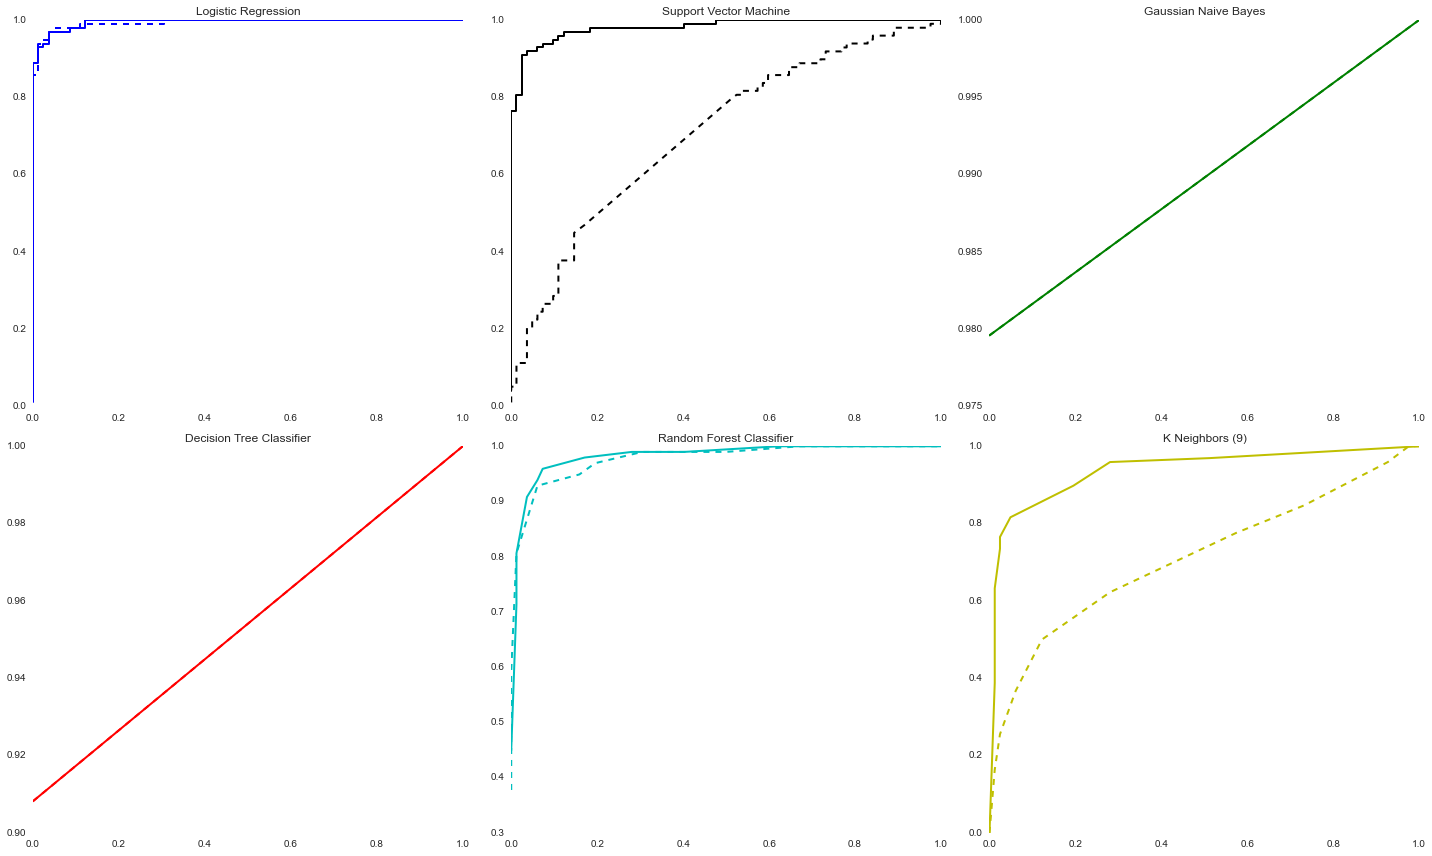

In [11]:
plt.figure(figsize = (20,12))
plt.subplot(2, 3, 1)
plt.title("Logistic Regression")
plt.plot(log_roc[0], log_roc[1], "b--", linewidth = 2, label = "Unscaled")
plt.plot(log_scaled_roc[0], log_scaled_roc[1], "b", linewidth = 2, label = "Scaled")

plt.subplot(2, 3, 2)
plt.title("Support Vector Machine")
plt.plot(svc_roc[0], svc_roc[1], "k--", linewidth = 2, label = "Unscaled")
plt.plot(svc_scaled_roc[0], svc_scaled_roc[1], "k", linewidth = 2, label = "Scaled")

plt.subplot(2, 3, 3)
plt.title("Gaussian Naive Bayes")
plt.plot(gnb_roc[0], gnb_roc[1], "g--", linewidth = 2, label = "Unscaled")
plt.plot(gnb_scaled_roc[0], gnb_scaled_roc[1], "g", linewidth = 2, label = "Scaled")

plt.subplot(2, 3, 4)
plt.title("Decision Tree Classifier")
plt.plot(dtree_roc[0], dtree_roc[1], "r--", linewidth = 2, label = "Unscaled")
plt.plot(dtree_scaled_roc[0], dtree_scaled_roc[1], "r", linewidth = 2, label = "Scaled")

plt.subplot(2, 3, 5)
plt.title("Random Forest Classifier")
plt.plot(rf_roc[0], rf_roc[1], "c--", linewidth = 2, label = "Unscaled")
plt.plot(rf_scaled_roc[0], rf_scaled_roc[1], "c", linewidth = 2, label = "Scaled")

plt.subplot(2, 3, 6)
plt.title("K Neighbors (9)")
plt.plot(knn_roc[0], knn_roc[1], "y--", linewidth = 2, label = "Unscaled")
plt.plot(knn_scaled_roc[0], knn_scaled_roc[1], "y", linewidth = 2, label = "Scaled")

plt.tight_layout()
plt.show()

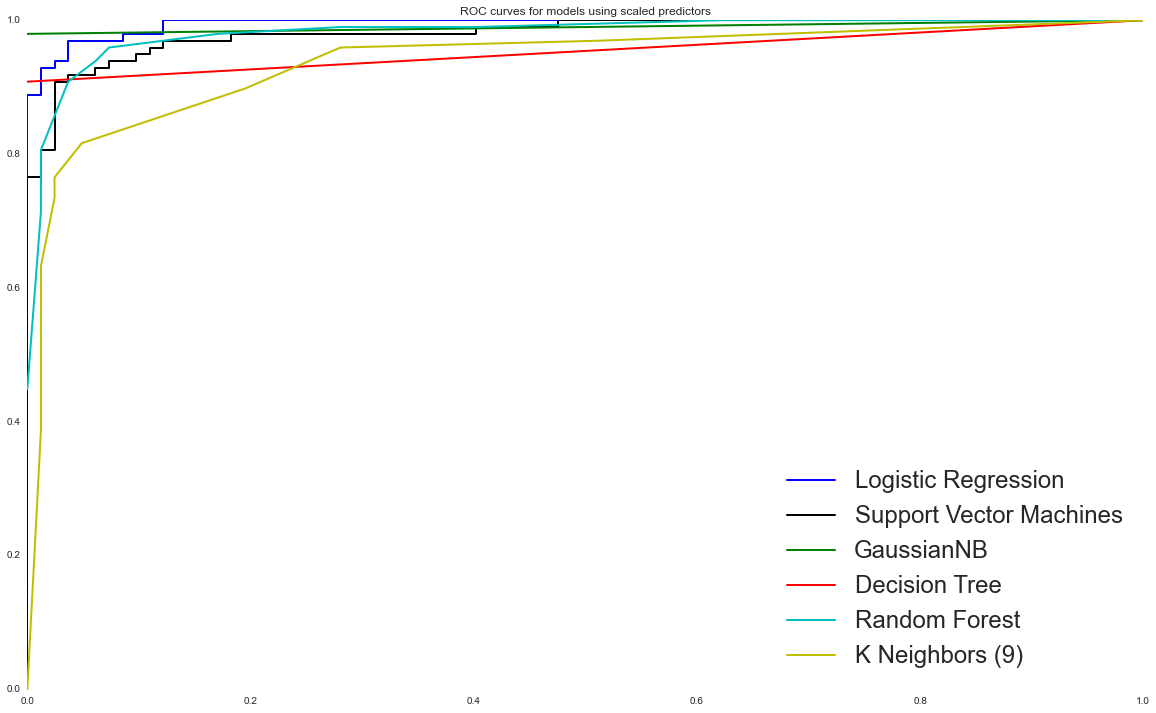

In [12]:
plt.figure(figsize = (20,12))

plt.title("ROC curves for models using scaled predictors")
plt.plot(log_scaled_roc[0], log_scaled_roc[1], "b", linewidth = 2, label = "Logistic Regression")
plt.plot(svc_scaled_roc[0], svc_scaled_roc[1], "k", linewidth = 2, label = "Support Vector Machines")
plt.plot(gnb_scaled_roc[0], gnb_scaled_roc[1], "g", linewidth = 2, label = "GaussianNB")
plt.plot(dtree_scaled_roc[0], dtree_scaled_roc[1], "r", linewidth = 2, label = "Decision Tree")
plt.plot(rf_scaled_roc[0], rf_scaled_roc[1], "c", linewidth = 2, label = "Random Forest")
plt.plot(knn_scaled_roc[0], knn_scaled_roc[1], "y", linewidth = 2, label = "K Neighbors (9)")
plt.legend(loc = 4, prop={'size':24})
plt.show()

In [13]:
scores = [accuracy_score, precision_score, recall_score, f1_score]

def get_metrics(X_train, X_test):
    
    # create empty lists
    LogisticReg = []
    SVMC = []
    GaussNB = []
    DecisionTree = []
    RandomForest = []
    kNN9 = []
    
    # list of lists
    lists = [LogisticReg, SVMC, GaussNB, DecisionTree, RandomForest, kNN9]
    
    # populate lists with scores of each scoring method
    for i, model in enumerate(models):
        for score in scores:
            est = model
            est.fit(X_train, y_train)
            pred = est.predict(X_test)
            lists[i].append(score(y_test, pred))
        
    # create a dataframe which aggregates the lists
    scores_df = pd.DataFrame(data = [LogisticReg, SVMC, GaussNB, DecisionTree, RandomForest, kNN9])
    scores_df.index = ["LogisticReg", "SVMC", "GaussNB", "DecisionTree", "RandomForest", "kNN9"]
    scores_df.columns = ["Accuracy", "Precision", "Recall", "F1"]
    return scores_df

In [14]:
get_metrics(X_train, X_test)

,Accuracy,Precision,Recall,F1
LogisticReg,0.961111,0.978947,0.948980,0.963731
SVMC,0.544444,0.544944,0.989796,0.702899
GaussNB,0.988889,1.000000,0.979592,0.989691
DecisionTree,0.950000,1.000000,0.908163,0.951872
RandomForest,0.938889,0.915789,0.918367,0.915789
kNN9,0.666667,0.726190,0.622449,0.670330


In [15]:
get_metrics(X_train_std, X_test_std)

,Accuracy,Precision,Recall,F1
LogisticReg,0.950000,0.978495,0.928571,0.952880
SVMC,0.933333,0.967391,0.908163,0.936842
GaussNB,0.988889,1.000000,0.979592,0.989691
DecisionTree,0.950000,1.000000,0.908163,0.951872
RandomForest,0.922222,0.968085,0.908163,0.942408
kNN9,0.861111,0.974026,0.765306,0.857143


In [16]:
models[0].fit(X_train, y_train).coef_
# 'age','sex','cigs','famhist',

array([[ -4.98316890e-02,   7.02027183e-01,  -7.73210031e-01,
          1.36417673e-01,   4.96577323e-01,   7.92165816e-03,
          6.39294408e-01,  -1.57394585e-03,  -6.89377425e-02,
         -5.90741785e-03,  -4.89547385e-03,   8.50493271e-02,
         -1.01353980e+00,  -2.14009962e-01,  -3.57509787e-01,
          3.11435770e-01,   5.47621304e-02,  -1.82810677e-01,
         -5.03657492e-02,  -7.25564297e-02,   6.78140912e-03,
         -1.32641601e-02,  -1.45905930e-02,   2.08034586e-03,
         -9.02095826e-03,  -3.81796238e-02,   4.93759856e-01,
          1.18727429e-01,   3.17017032e-01,  -4.77619957e-02,
         -5.82151018e-03,   1.15677162e-01,  -3.72003226e-02,
          3.15047367e+00,   2.71194455e+00,  -2.32732937e-01,
          3.34414252e+00,  -5.95984566e-01,   2.24239198e+00,
         -1.40211158e+00,   3.11972615e+00,   2.00898410e+00,
         -2.59454248e-01,  -9.34053391e-01,  -5.19794502e-01,
          2.85892195e-02,   0.00000000e+00,  -5.63739093e-01,
        

In [17]:
from nvd3 import pieChart
type = 'pieChart'
chart = pieChart(name=type, color_category='category20c', height=450, width=450)
xdata = ["Orange", "Banana", "Pear", "Kiwi", "Apple", "Strawberry", "Pineapple"]
ydata = [3, 4, 0, 1, 5, 7, 3]
extra_serie = {"tooltip": {"y_start": "", "y_end": " cal"}}
chart.add_serie(y=ydata, x=xdata, extra=extra_serie)
chart.buildcontent()
print chart.htmlcontent

loaded nvd3 IPython extension
run nvd3.ipynb.initialize_javascript() to set up the notebook
help(nvd3.ipynb.initialize_javascript) for options

    <div id="piechart"><svg style="width:450px;height:450px;"></svg></div>


    <script>



    data_piechart=[{"values": [{"value": 3, "label": "Orange"}, {"value": 4, "label": "Banana"}, {"value": 0, "label": "Pear"}, {"value": 1, "label": "Kiwi"}, {"value": 5, "label": "Apple"}, {"value": 7, "label": "Strawberry"}, {"value": 3, "label": "Pineapple"}], "key": "Serie 1"}];

    nv.addGraph(function() {
        var chart = nv.models.pieChart();
        chart.margin({top: 30, right: 60, bottom: 20, left: 60});
        var datum = data_piechart[0].values;

    chart.tooltipContent(function(key, y, e, graph) {
          var x = String(key);
              var y =  String(y)  + ' cal';

              tooltip_str = '<center><b>'+x+'</b></center>' + y;
              return tooltip_str;
              });
        chart.showLabels(true);

            ch

In [18]:
import numpy as np
import math
cigs=30
sex=1
famhist=1
age= range(20,101)
age=np.array(age)
betas=[0.04847, 1.68034, 0.002758, 0.185318]
prob_c_30= (betas[0]*age+betas[1]*sex+betas[2]*cigs+betas[3]*famhist)
prob_c_30= 100/(1+np.exp(-prob_c_30))

cigs=60
prob_c_60=betas[0]*age+betas[1]*sex+betas[2]*cigs+betas[3]*famhist
prob_c_60=100/(1+np.exp(-prob_c_60))
cigs=0
prob_c_0=betas[0]*age+betas[1]*sex+betas[2]*cigs+betas[3]*famhist
prob_c_0=100/(1+np.exp(-prob_c_0))

In [19]:
import nvd3
nvd3.ipynb.initialize_javascript()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from nvd3 import pieChart

# #Open File to write the D3 Graph
# output_file = open('test-nvd3.html', 'w')

# type = 'pieChart'
# chart = pieChart(name=type, color_category='category20c', height=450, width=900)
# chart.set_containerheader("\n\n<h2>" + type + "</h2>\n\n")

# #Create the keys
# xdata = ["Orange", "Banana", "Pear", "Kiwi", "Apple", "Strawberry", "Pineapple"]
# ydata = [3, 4, 0, 1, 5, 7, 3]

# #Add the serie
# extra_serie = {"tooltip": {"y_start": "", "y_end": " cal"}}
# chart.add_serie(y=ydata, x=xdata, extra=extra_serie)
# chart.buildhtml()
# output_file.write(chart.htmlcontent)

# #close Html file
# output_file.close()

In [21]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
Examples for Python-nvd3 is a Python wrapper for NVD3 graph library.
NVD3 is an attempt to build re-usable charts and chart components
for d3.js without taking away the power that d3.js gives you.
Project location : https://github.com/areski/python-nvd3
"""

from nvd3 import lineChart

# Open File for test
output_file = open('test_lineChart.html', 'w')
# ---------------------------------------
type = "lineChart"


# chart = lineChart(name=type, x_is_date=False, x_axis_format="AM_PM")
chart = lineChart(name=type, x_is_date=False,height=550, width=800)

In [22]:
xdata = age
ydata = prob_c_0
ydata2 = prob_c_30
ydata3= prob_c_60

kwargs1 = {'color': 'black'}
kwargs2 = {'color': 'red'}
kwargs3={'color':'blue'}

extra_serie = {"tooltip": {"y_start": "There is ", "y_end": " calls"}}
chart.add_serie(y=ydata, x=xdata, name='#Cigarettes/day=0', extra=extra_serie, **kwargs1)

extra_serie = {"tooltip": {"y_start": "", "y_end": " min"}}
chart.add_serie(y=ydata2, x=xdata, name='#Cigarettes/day=30', extra=extra_serie, **kwargs2)

extra_serie = {"tooltip": {"y_start": "", "y_end": " min"}}
chart.add_serie(y=ydata3, x=xdata, name='#Cigarettes/day=60', extra=extra_serie, **kwargs3)

chart.create_x_axis("xAxis", "labeltest1")
chart.create_y_axis("yAxis", "Risk percentage")

chart.buildhtml()

output_file.write(chart.htmlcontent)

# close Html file
output_file.close()